$$\require{mhchem}$$       

# Homework 5
## Pengfei Cheng
## AndrewID: pengfeic

# Problem 1
Improving selectivity with a membrane reactor

In [4]:
import numpy as np
from scipy.integrate import odeint as _odeint
from scipy.optimize import fsolve as _fsolve
import matplotlib.pyplot as plt
import quantities as u

In [6]:
def fsolve(func, t0):
    'wrapped fsolve command to work with quantities'
    # store the units on the initial guess
    tU = 1 * t0.units  # units on initial guess, normalized
    print(t0)
    print(tU)
    # wrap the function so it returns a regular number
    def wrapped_func(t):
        't will be unitless, so we add unit to it. t * tU has units.'
        return float(func(t * tU))
    # use the original fsolve with the wrapped function
    sol, = _fsolve(wrapped_func, t0)
    # put the original units back on the solution
    print(sol)
    return sol * tU

In [7]:
def odeint(dydx, y0, xspan):
    # get x units
    xU = 1.0 * xspan[0].units
    yU = 1.0 * y0.units

    def wrapped_dydx(y, x):
        v = dydx(y * yU, x * xU).rescale(yU / xU)
        return float(v)

    sol = _odeint(wrapped_dydx, float(y0), [float(x) for x in xspan])
    return sol * yU

We're interested in improving the selectivity of a PFR with two competing reactions:
\begin{align*}
\ce{A + B ->[r_1] D}\\
\ce{A + B ->[r_2] U}
\end{align*}
where $\ce{D}$ is a desirable product, and  $\ce{U}$ is the undesirable product.  We define the selectivity in the reactor as:
\begin{align*}
S_{D/(D+U)}=\frac{F_D}{F_D+F_U}
\end{align*}
The first reaction proceeds with rate $r_1=k_1 C_A^2C_B$ with $k_1=2$dm$^6$/mol$^2\cdot$ s, while the second reaction follows a different rate law $r_2=k_2 C_AC_B^2$ with $k_2=3$dm$^6$/mol$^2\cdot$ s. In either case, the reactor volume is 50L with an inner diameter of 20 cm. You can assume the reactor is isobaric and isothermal. 

## Part A

In [14]:
u.dm=u.UnitLength('decimeter',0.1*u.m,'dm')
k1 = 2 * u.dm ** 6 / u.mol ** 2
k2 = 3 * u.dm ** 6 / u.mol ** 2
V = 50 * u.L
di = 20 *u.cm
s = 

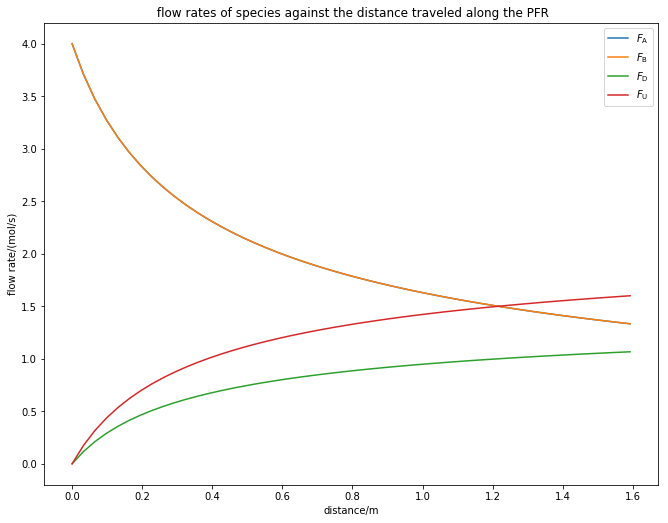

In [2]:
k1 = 2 * u.dm ** 6 / u.mol ** 2
k2 = 3 # dm^6/mol^2
V = 50 # L
di = 20 # cm, inner diameter
s = np.array([[-1,-1,1,0],[-1,-1,0,1]]).T # stoichiometric numbers, referring to A, B, D, U respectively
F0 = np.array([4, 4, 0, 0]).T # mol/s
FT0 = np.sum (F0)
CT0 = 0.8 # mol/L
v0 = FT0 / CT0 # L/s

L = (V/1000) / (3.14 * (di / 100) ** 2 / 4) # m

def dFdl(F,l):
    'dFdl = dFdV*(pi*d^2/4))'
    FA, FB, FD, FU = F
    FT = np.sum (F)
    C = F / v0
    CA, CB, CD, CU = C
    
    r1 = k1 * CA ** 2 * CB
    r2 = k2 * CA * CB ** 2
    
    r = np.matmul (s, [r1,r2])
    return r * (3.14 * (di / 100) ** 2 / 4) * 1000 # convert dFdV (L) to dFdl (m)

lspan = np.linspace(0, L)
sol = odeint (dFdl, F0, lspan)

for i in range(4):
    plt.plot (lspan, sol[:,i])
plt.legend(['$F_\mathrm{A}$','$F_\mathrm{B}$','$F_\mathrm{D}$','$F_\mathrm{U}$'])
plt.xlabel('distance/m')
plt.ylabel('flow rate/(mol/s)')
plt.title(' flow rates of species against the distance traveled along the PFR')
fig = plt.gcf()
fig.set_size_inches(11, 8.5,forward=True)
plt.show()

In [3]:
FD_exit = sol[-1,2]
print ('The final molar flow rate of D is {:1.4f} mol/s.'.format(FD_exit))

The final molar flow rate of D is 1.0667 mol/s.


#### Part B:  Calculate and plot the selectivity $S_{D/(D+U)}$ vs. reactor length (m). The scale of $S_{D/(D+U)}$ on the y-axis should be [0, 1] (2 pts)

## Part B

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


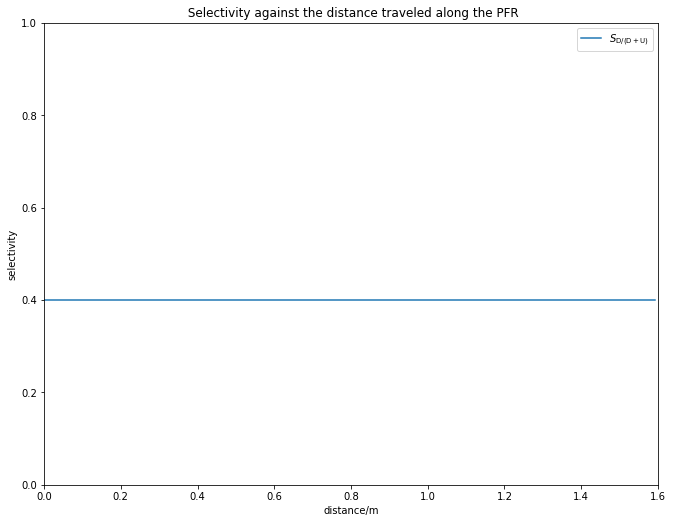

In [5]:
S = sol[:,2] / (sol[:,2] + sol[:,3])
S[0] = S[1]

plt.plot (lspan, S)
plt.legend(['$S_\mathrm{D/(D+U)}$'])
plt.xlabel('distance/m')
plt.ylabel('selectivity')
plt.title(' Selectivity against the distance traveled along the PFR')
plt.axis([0, 1.6, 0, 1])
fig = plt.gcf()
fig.set_size_inches(11, 8.5,forward=True)

plt.show()

#### Part C:  Solve for and plot the flow rate profiles of A, B, D, and U (mol/s) against the distance traveled along the PFR (m). This time, assume that:
1. The PFR is a membrane PFR, where A is fed into the inner vessel, B is fed into the outer vessel, and only species B may transport across the membrane.
2. A is flowing in to the inner vessel at a molar flow rate of $4\; mol/s$ and a concentration of $0.4\; mol/dm^3$.
3. B is flowing in to the outer vessel at a molar flow rate of $4\; mol/s$ and a concentration of $0.4\; mol/dm^3$.
4. mass transport across the membrane (from the outer to the inner vessel) can be modeled with $R_B=ak_{cB}(C_{Bin}-C_{Bout})$ with $k_{cB}=0.1\;$dm/s$.

## Part C

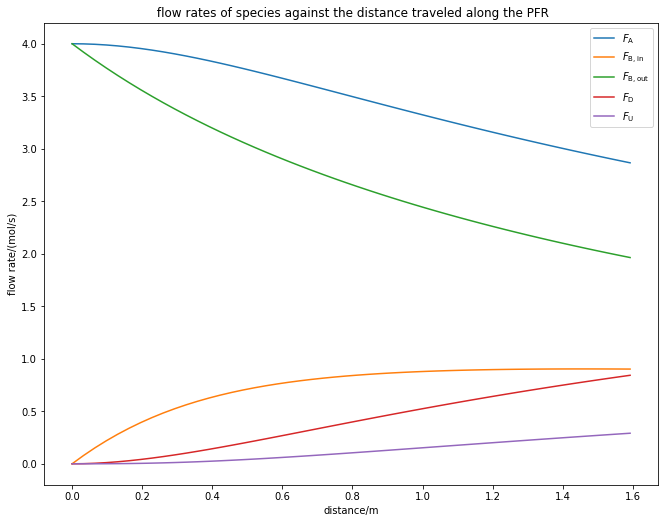

In [6]:
kcB=0.1 # dm/s
a = 4 / (di/10) # 1/dm 
s2 = np.array([[-1,-1,0,1,0],[-1,-1,0,0,1]]).T # stoichiometric numbers, referring to A, B_in, B_out, D, U respectively
F02 = np.array([4, 0, 4, 0, 0]).T # mol/s

def dFdl2(F,l):
    'dFdl = dFdV*(pi*d^2/4))'
    FA, FB_in, FB_out, FD, FU = F
    FT = np.sum (F)
    C = F / v0
    CA, CB_in, CB_out, CD, CU = C
    
    r1 = k1 * CA ** 2 * CB_in
    r2 = k2 * CA * CB_in ** 2
    
    RB = kcB * a * (CB_in - CB_out)
    
    r = np.matmul (s2, [r1,r2])
    r[1] += - RB
    r[2] += + RB
    return r * (3.14 * (di / 100) ** 2 / 4) * 1000 # convert dFdV (L) to dFdl (m)

sol = odeint (dFdl2, F02, lspan)

for i in range(5):
    plt.plot (lspan, sol[:,i])
plt.legend(['$F_\mathrm{A}$','$F_\mathrm{B,in}$','$F_\mathrm{B,out}$','$F_\mathrm{D}$','$F_\mathrm{U}$'])
plt.xlabel('distance/m')
plt.ylabel('flow rate/(mol/s)')
plt.title(' flow rates of species against the distance traveled along the PFR')
fig = plt.gcf()
fig.set_size_inches(11, 8.5,forward=True)
plt.show()

con = sol[:,3] / F0[0]

#### Part D:  To make a fair comparison comparison between the standard PFR and the membrane PFR, we want to analyze a membrane PFR system that has an outlet molar flowrate of D equal to the one you calculated in Part A (for the standard PFR). For the membrane PFR, what is a molar feedrate of B in the outer vessel (mol/s) that will yield this outlet flowrate of D? (4 pts)

## Part D

In [7]:
def FindB(FB0):
    F02 = np.array([4, 0, FB0, 0, 0]).T # mol/s
    FT02 = np.sum(F02)
    sol = odeint (dFdl2, F02, lspan)
    return sol[-1,3] - FD_exit

FB02, info, ier, msg = fsolve (FindB, 5, full_output = 1)
print('The initial molar flowrate of B would be {:1.4f} mol/s to make the final flowrate of D reaches {:1.4f} mol/s.'.format(FB02[0], FD_exit))

The initial molar flowrate of B would be 6.0578 mol/s to make the final flowrate of D reaches 1.0667 mol/s.


#### Part E:  Now we want to compare the selectivities of the two reactor types. Start by recalculating the flow profiles in the membrane PFR—i.e., Part C—but use the newly identified inlet flowrate of B. Then use this profile to calculate the selectivity (mol/mol) as a function of reactor length (m). Now plot this new selectivity profile alongside the selectivity profile you created in Part B. Which reactor configuration would you recommend, standard PFR or membrane? Why? (2 pts)

## Part E

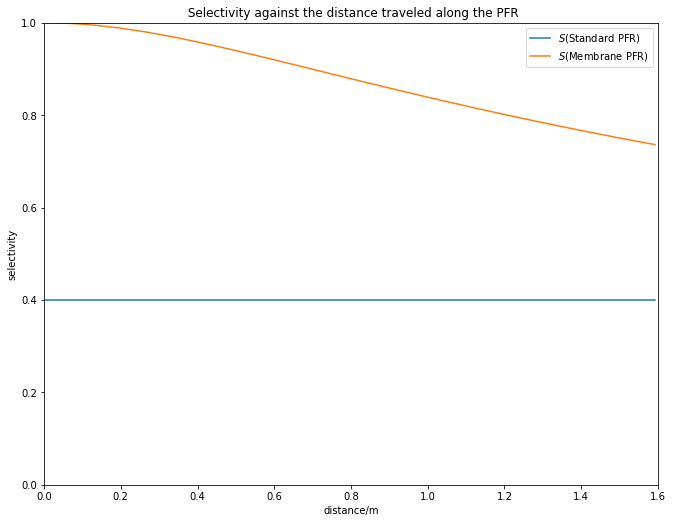

In [8]:
F02 = np.array([4, 0, FB02, 0, 0]).T

sol = odeint (dFdl2, F02, lspan)

S2 = sol[:,2] / (sol[:,2] + sol[:,3])

plt.plot (lspan, S, lspan, S2)
plt.legend(['$S$(Standard PFR)', '$S$(Membrane PFR)'])
plt.xlabel('distance/m')
plt.ylabel('selectivity')
plt.title(' Selectivity against the distance traveled along the PFR')
plt.axis([0, 1.6, 0, 1])
fig = plt.gcf()
fig.set_size_inches(11, 8.5,forward=True)
plt.show()

con2 = sol[:,3] / F0[0] # define the conversion

The membrane reactor has absolutely higher selectivity than the standard PFR along the length of the reactors. However, the conversion of B in the membrane reactor is lower than in the PFR. 

If the separation of products and reactants are not costly, I would choose the membrane reactor and build a loop flow to improve the conversion. Otherwise I would rather use PFR. In real life, the values of desirable and undesirable products, the cost of separation and other factors would all affect the decision.

# Bonus

#### For regulatory reasons we need a minimum selectivity of 75%, and for economic reasons we want a conversion of at least 25%. We are allowed to change the feedrate of B and the length of the membrane PFR. To the nearest decimeter, what's the smallest reactor length we can use to achieve both criteria? (4 pts)

In [9]:
# find the max length to keep the selectivity > 75%

for i in range (50):
    if S2[i] <= 0.75:
        print (lspan[i-1])
        break

# find the min length to keep the conversion > 25%

for i in range (50):
    if con2[i] > 0.25:
        print (lspan[i])
        break

1.49486546211
1.46236838685


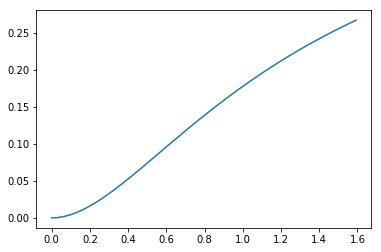

In [10]:
plt.plot(lspan, con2)
plt.show()